In [1]:
import pandas as pd

import seaborn as sns
import glob
from matplotlib import pyplot as plt

In [4]:
!ls ../outputs/reg/output

best_model_gamma_0.1.csv  best_model_gamma_0.75.csv best_model_spec_True.csv
best_model_gamma_0.25.csv best_model_gamma_1.0.csv
best_model_gamma_0.5.csv  best_model_spec_False.csv


In [7]:
train_loss, val_loss = {}, {}

for x in glob.glob("../outputs/reg/output/*gamma*.csv"):
    print(x)
    gamma = float(x.split("gamma_")[1].split('.csv')[0])

    df = pd.read_csv(x).iloc[-1]


    train_loss[gamma] = df.train_loss
    val_loss[gamma] = df.val_loss

../outputs/reg/output/best_model_gamma_0.9.csv
../outputs/reg/output/best_model_gamma_0.25.csv
../outputs/reg/output/best_model_gamma_1.0.csv
../outputs/reg/output/best_model_gamma_0.5.csv
../outputs/reg/output/best_model_gamma_0.75.csv
../outputs/reg/output/best_model_gamma_0.1.csv


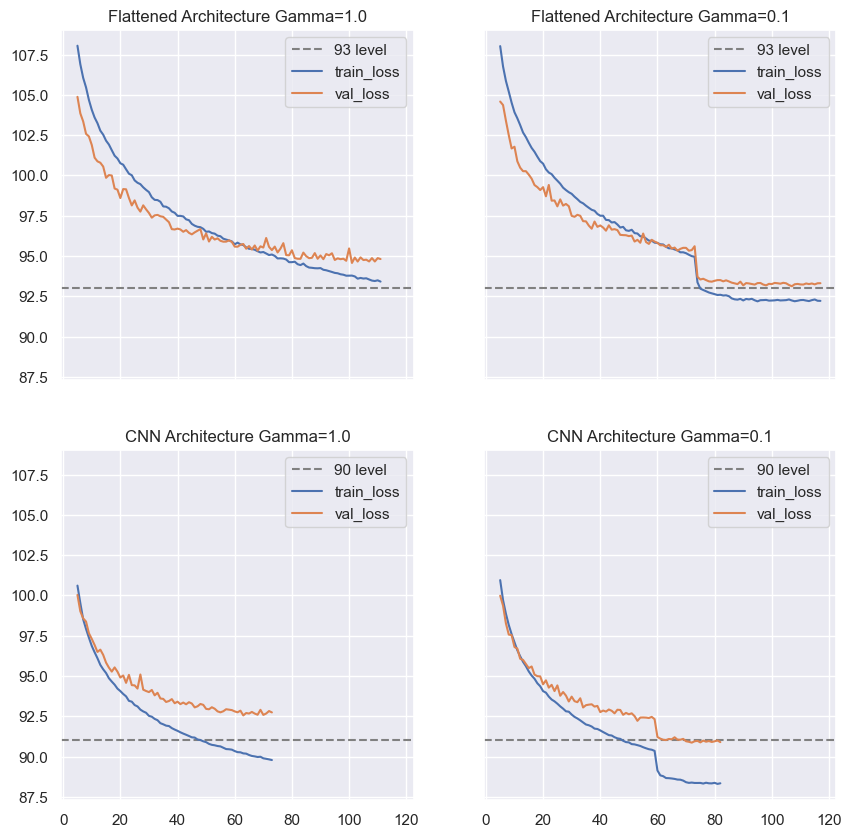

In [83]:
sns.set_theme()

fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharey=True, sharex=True)


ax[0][0].axhline(93, label='93 level', linestyle='--', color='grey')
df1 = pd.read_csv('../outputs/reg/output/best_model_gamma_1.0.csv').loc[:, ['train_loss', 'val_loss']].iloc[5:]
df1.plot(ax=ax[0][0], title='Flattened Architecture Gamma=1.0')

ax[0][1].axhline(93, label='93 level', linestyle='--', color='grey')
df2 = pd.read_csv('../outputs/reg/output/best_model_gamma_0.1.csv').loc[:, ['train_loss', 'val_loss']].iloc[5:]
df2.plot(ax=ax[0][1], title='Flattened Architecture Gamma=0.1')

ax[1][0].axhline(91, label='90 level', linestyle='--', color='grey')
ax[1][1].axhline(91, label='90 level', linestyle='--', color='grey')

df3 = pd.read_csv('../outputs/reg/output/cnn_best_model_gamma_1.0.csv').loc[:, ['train_loss', 'val_loss']].iloc[5:]
df3.plot(ax=ax[1][0], title='CNN Architecture Gamma=1.0')

df4 = pd.read_csv('../outputs/reg/output/cnn_best_model_gamma_0.1.csv').loc[:, ['train_loss', 'val_loss']].iloc[5:]
df4.plot(ax=ax[1][1], title='CNN Architecture Gamma=0.1')


ax[0][0].legend()
ax[0][1].legend()
ax[1][0].legend()
ax[1][1].legend()

plt.savefig('learning_rate.pdf')

In [84]:
df1.tail()

,train_loss,val_loss
107,93.541577,94.660574
108,93.471778,94.868103
109,93.445765,94.656784
110,93.488004,94.866223
111,93.410743,94.808828


In [85]:
df2.tail()

,train_loss,val_loss
113,92.200553,93.254939
114,92.259558,93.292092
115,92.300319,93.236981
116,92.220899,93.305404
117,92.213336,93.309667


In [86]:
df3.tail()

,train_loss,val_loss
69,89.987179,92.899141
70,89.890302,92.584190
71,89.859148,92.669596
72,89.824218,92.823495
73,89.783146,92.738986


In [87]:
df4.tail()

,train_loss,val_loss
78,88.339639,90.961061
79,88.334149,90.905046
80,88.368344,90.945503
81,88.302614,90.995661
82,88.340600,90.895515


In [24]:
pd.Series(train_loss).sort_index()

0.10    92.213336
0.25    92.237409
0.50    90.805655
0.75    90.654165
0.90    90.374179
1.00    93.410743
dtype: float64

In [89]:
!ls ../logs/cnn/latent_again

best_model_latent_0.0.csv   best_model_latent_0.05.csv
best_model_latent_0.025.csv best_model_latent_0.1.csv


In [96]:
train_loss, val_loss = {}, {}

for x in glob.glob("../logs/cnn/latent_again/*.csv"):
    print(x)
    gamma = x.split("latent_")[2]
    gamma=gamma.split('.csv')[0]

    df = pd.read_csv(x).iloc[-1]


    train_loss[gamma] = df.train_loss
    val_loss[gamma] = df.val_loss

../logs/cnn/latent_again/best_model_latent_0.1.csv
../logs/cnn/latent_again/best_model_latent_0.025.csv
../logs/cnn/latent_again/best_model_latent_0.0.csv
../logs/cnn/latent_again/best_model_latent_0.05.csv


In [97]:
pd.Series(train_loss).sort_index()

0.0      88.358872
0.025    88.131208
0.05     89.723223
0.1      91.633564
dtype: float64

In [98]:
pd.Series(val_loss).sort_index()

0.0      91.238816
0.025    91.141847
0.05     91.576664
0.1      92.771670
dtype: float64